<a href="https://colab.research.google.com/github/COVID-19-Severity/DataSet/blob/main/COVID19-Machine_Learning_Biomarkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

# :: SCRIPT AUTHORS ::
## * Ademir Luiz do Prado
## * Alexandre de Fátima Cobre
<hr>

# MACHINE LEARNING (ML)
Development of a Machine Learning model for the prognosis of COVID-19 in terms of SEVERITY using laboratory biomarkers.
The data are from examinations of patients treated at the Hospital de Clínicas of the Federal University of Paraná
# LEGEND:
### Sex:
##### 1=Female
##### 2=Male
### COVID:
##### * Total: 35,109 Positive Samples
##### * Non-Severe (Mild to Moderate): 7,719 samples
##### * Severe: 27,390 samples
### Classification Severity:
##### * Severe (Serious - Inpatients)
##### * Non-Severe (Mild to Moderate - Outpatients)
### Period of the Samples:
##### * March 2020 to September 2022

# OBJECTIVE:
Develop a Machine Learning model to predict the severity of COVID-19 and identify biomarkers associated with this severity in order to optimize priority in hospital care.

In [1]:
# PHASES:
# 1: Import the DataSet
# 2: Import the Pandas library for handling the DataSet
# 3: Remove unnecessary columns (features) from DataSet
# 4: Install the Pycaret library to aid Auto-Machine Learn
# 5: Import the Pycaret library
# 6: Perform data pre-processing
# 7: Build and compare models
# 8: Train the best model based on predictive performance metrics
# 9: Extract the metrics results from the model
#10: Write conclusions about the best identified model
#11: Save the model to make predictions in real analyzes (Deploy)

In [2]:
# Phase 1: Import the DataSet

from google.colab import files
uploaded = files.upload()

Saving COVID19-DataSetSeverity.csv to COVID19-DataSetSeverity.csv


In [3]:
# Phase 2: Import the Pandas library for handling the DataSet
import pandas as pd
DataSet = pd.read_csv("COVID19-DataSetSeverity.csv")
display (DataSet)

,ID,COVID,Age,Sex,Erythrocytes,Haemoglobin,Leukocytes,Mature Neutrophils,Immature Neutrophils,Neutrophils,...,pCO2,pO2,sO2,pH,HCO3 (standard),HCO3 (actual),BE(ECF),BE(B),CTCO2,Procalcitonin
0,1,Mild to Moderate,56,2,2.66,NaN,8.67,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mild to Moderate,76,1,4.49,NaN,11.84,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mild to Moderate,56,2,2.98,NaN,8.05,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mild to Moderate,68,2,4.37,NaN,9.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Mild to Moderate,61,1,4.70,NaN,7.92,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35104,35105,Severe,47,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35105,35106,Severe,61,2,3.30,NaN,6.55,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35106,35107,Severe,47,2,4.06,NaN,8.42,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35107,35108,Severe,55,2,4.58,NaN,12.15,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Phase 3: Remove unnecessary columns (features) from DataSet
DataSetSeverity = DataSet.drop("ID", axis = 1)
display (DataSetSeverity)

,COVID,Age,Sex,Erythrocytes,Haemoglobin,Leukocytes,Mature Neutrophils,Immature Neutrophils,Neutrophils,Basophils,...,pCO2,pO2,sO2,pH,HCO3 (standard),HCO3 (actual),BE(ECF),BE(B),CTCO2,Procalcitonin
0,Mild to Moderate,56,2,2.66,NaN,8.67,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mild to Moderate,76,1,4.49,NaN,11.84,NaN,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mild to Moderate,56,2,2.98,NaN,8.05,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mild to Moderate,68,2,4.37,NaN,9.76,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mild to Moderate,61,1,4.70,NaN,7.92,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35104,Severe,47,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35105,Severe,61,2,3.30,NaN,6.55,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35106,Severe,47,2,4.06,NaN,8.42,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35107,Severe,55,2,4.58,NaN,12.15,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Phase 4: Install the Pycaret library to aid Auto-Machine Learn
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 71.2 MB/s eta 0:0

In [6]:
# Phase 5: Import the Pycaret library
from pycaret import classification


In [7]:
# Phase 6: Perform data pre-processing
classification_setup = classification.setup(data = DataSetSeverity, target = "COVID")

,Description,Value
0,Session id,5939
1,Target,COVID
2,Target type,Binary
3,Target mapping,"Mild to Moderate: 0, Severe: 1"
4,Original data shape,"(35109, 51)"
5,Transformed data shape,"(35109, 51)"
6,Transformed train set shape,"(24576, 51)"
7,Transformed test set shape,"(10533, 51)"
8,Numeric features,50
9,Rows with missing values,100.0%


In [8]:
# Phase 7: Build and compare models
models = classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8811,0.9176,0.9522,0.9010,0.9259,0.6262,0.6325,1.2580
xgboost,Extreme Gradient Boosting,0.8797,0.9139,0.9504,0.9009,0.9250,0.6228,0.6287,6.3970
rf,Random Forest Classifier,0.8769,0.9064,0.9551,0.8943,0.9237,0.6069,0.6161,5.3680
et,Extra Trees Classifier,0.8766,0.9059,0.9556,0.8937,0.9236,0.6052,0.6147,4.9450
gbc,Gradient Boosting Classifier,0.8633,0.8931,0.9632,0.8744,0.9166,0.5421,0.5624,6.4930
ada,Ada Boost Classifier,0.8498,0.8741,0.9493,0.8701,0.9079,0.5046,0.5192,1.8570
dt,Decision Tree Classifier,0.8182,0.7395,0.8800,0.8862,0.8831,0.4747,0.4749,0.8470
lda,Linear Discriminant Analysis,0.8083,0.7919,0.9556,0.8260,0.8861,0.3013,0.3367,0.4790
ridge,Ridge Classifier,0.8040,0.0000,0.9727,0.8129,0.8856,0.2373,0.2959,0.2020
lr,Logistic Regression,0.7960,0.7636,0.9652,0.8099,0.8807,0.2112,0.2580,3.5250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
# Phase 8: Train the best model based on predictive performance metrics
# First: The Light Gradient Boosting Machine (lightgbm) model achieved the best performance. We will create the Light Gradient Boosting Machine model
model_lightgbm = classification.create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8853,0.9214,0.9520,0.9058,0.9283,0.6420,0.6471
1,0.8747,0.9120,0.9536,0.8931,0.9223,0.5999,0.6087
2,0.8735,0.9189,0.9447,0.8984,0.9210,0.6049,0.6098
3,0.8849,0.9197,0.9531,0.9045,0.9281,0.6400,0.6456
4,0.8832,0.9196,0.9515,0.9039,0.9271,0.6355,0.6408
5,0.8812,0.9165,0.9551,0.8989,0.9262,0.6240,0.6316
6,0.8832,0.9167,0.9520,0.9035,0.9271,0.6344,0.6399
7,0.8877,0.9196,0.9640,0.8993,0.9305,0.6394,0.6500
8,0.8828,0.9167,0.9484,0.9058,0.9266,0.6365,0.6406


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
# Second: The Extreme Gradient Boosting (xgboost) model second the best performance.
model_xgboost = classification.create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8893,0.9173,0.9494,0.9123,0.9305,0.6596,0.6627
1,0.8739,0.9093,0.9484,0.8961,0.9215,0.6025,0.6088
2,0.8820,0.9184,0.9505,0.9034,0.9263,0.6314,0.6365
3,0.8792,0.9140,0.9531,0.8982,0.9248,0.6184,0.6255
4,0.8812,0.9154,0.9515,0.9016,0.9259,0.6278,0.6336
5,0.8845,0.9097,0.9562,0.9016,0.9281,0.6354,0.6426
6,0.8807,0.9160,0.9473,0.9044,0.9254,0.6299,0.6341
7,0.8803,0.9133,0.9588,0.8953,0.9259,0.6164,0.6263
8,0.8751,0.9117,0.9421,0.9021,0.9217,0.6138,0.6174


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
# Third: The Random Forest Classifier (rf) model third the best performance.
model_rf = classification.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8853,0.9132,0.9526,0.9054,0.9284,0.6415,0.6468
1,0.8763,0.8975,0.9625,0.8884,0.9239,0.5963,0.6102
2,0.8788,0.9152,0.9562,0.8955,0.9249,0.6129,0.6218
3,0.8820,0.8988,0.9609,0.8955,0.9270,0.6212,0.6318
4,0.8731,0.9044,0.9494,0.8943,0.9211,0.5989,0.6059
5,0.8800,0.9116,0.9557,0.8972,0.9255,0.6188,0.6270
6,0.8783,0.9031,0.9557,0.8954,0.9246,0.6119,0.6206
7,0.8767,0.9082,0.9635,0.8880,0.9242,0.5967,0.6113
8,0.8718,0.9075,0.9442,0.8969,0.9199,0.5993,0.6043


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
# Fourth: The Extra Trees Classifier (et) model fourth the best performance.
model_et = classification.create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8881,0.9129,0.9546,0.9069,0.9301,0.6502,0.6556
1,0.8743,0.8974,0.9604,0.8877,0.9226,0.5906,0.6038
2,0.8694,0.9111,0.9541,0.8871,0.9194,0.5784,0.5892
3,0.8727,0.8995,0.9551,0.8897,0.9213,0.5908,0.6011
4,0.8800,0.9061,0.9583,0.8952,0.9257,0.6160,0.6258
5,0.8792,0.9100,0.9562,0.8959,0.9251,0.6151,0.6239
6,0.8763,0.9015,0.9531,0.8951,0.9232,0.6068,0.6148
7,0.8767,0.9101,0.9614,0.8895,0.9240,0.5991,0.6121
8,0.8783,0.9062,0.9484,0.9009,0.9240,0.6196,0.6248


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
# Fifth: The Gradient Boosting Classifier (gbc) model fifth the best performance.
model_gbc = classification.create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8698,0.8943,0.9625,0.8816,0.9202,0.5699,0.5866
1,0.8609,0.8853,0.9687,0.8682,0.9157,0.5239,0.5508
2,0.8584,0.8905,0.9625,0.8699,0.9139,0.5222,0.5440
3,0.8662,0.8989,0.9650,0.8759,0.9183,0.5522,0.5727
4,0.8751,0.8992,0.9661,0.8844,0.9235,0.5878,0.6051
5,0.8596,0.8938,0.9604,0.8725,0.9143,0.5311,0.5504
6,0.8641,0.8885,0.9640,0.8746,0.9171,0.5442,0.5648
7,0.8616,0.8970,0.9682,0.8693,0.9161,0.5281,0.5541
8,0.8665,0.8955,0.9604,0.8796,0.9182,0.5591,0.5755


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
# Phase 9: Extract the metrics results from the 5 top models
# lightgbm model metrics
classification.evaluate_model(model_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
# xgboost model metrics
classification.evaluate_model(model_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
# rf model metrics
classification.evaluate_model(model_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
# et model metrics
classification.evaluate_model(model_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
# gbc model metrics
classification.evaluate_model(model_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

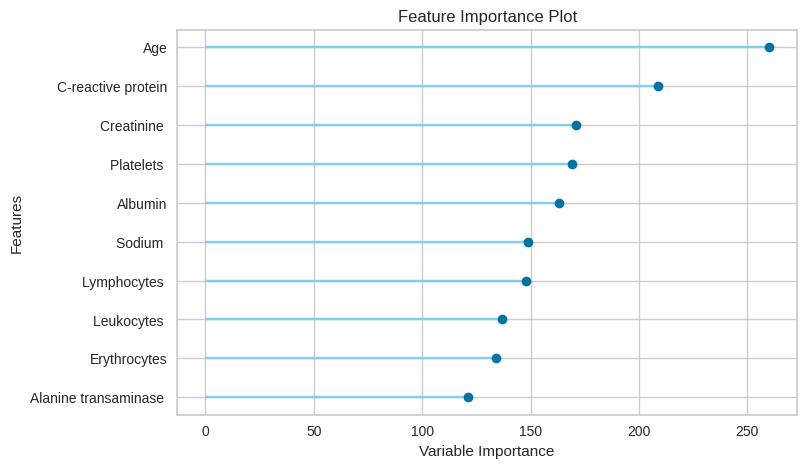

In [19]:
# Plotting only the 10 most important biomarkers for lightgbm model
classification.plot_model(model_lightgbm, plot ="feature")

In [20]:
# Phase 10: Write conclusions about the best identified model
# Several Machine Learning models were built to predict the diagnosis of COVID-19 using biomarker data from patients with COVID-19
# The Light Gradient Boosting Machine (lightgbm) model had the best predictive performance
# The 5 most important biomarkers for the prognosis of COVID-19, for the samples under study, were: C-reactive protein, Creatinine, Albumin, Lymphocytes and Erythrocytes
# The next step is to develop the App so that the model can be used in Health Institutions.

In [21]:
# Phase 11: Save the model to make predictions in real analyzes (Deploy)
classification.save_model(model_lightgbm, "BestModel-ML_LightGBM")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Sex', 'Erythrocytes',
                                              'Haemoglobin ', 'Leukocytes ',
                                              'Mature Neutrophils ',
                                              'Immature Neutrophils',
                                              'Neutrophils ', 'Basophils ',
                                              'Eosino...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                        